# Machine Learning Project For Car Prices 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
%matplotlib inline 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.linear_model import Lasso

In [7]:
from sklearn import metrics

In [8]:
df = pd.read_csv('car data.csv')

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
df.index

RangeIndex(start=0, stop=301, step=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [17]:
#checking is their is a missing values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
#checking the categoreies data 
print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [19]:
print(df.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [20]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Encording Categorical data 

In [26]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [27]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the Data and Target

In [29]:
x = df.drop(['Car_Name','Selling_Price'], axis = 1)
y = df['Selling_Price']

In [30]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [31]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Splitting the Data into Training Data and Testing Data 

In [32]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [33]:
# loading the linear regression model
lm = LinearRegression()

In [34]:
lm.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [36]:
#prediction on training data
training_data_prediction = lm.predict(x_train)

In [37]:
# R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8799451660493698


### Visualize the actual prices and predicted prices 

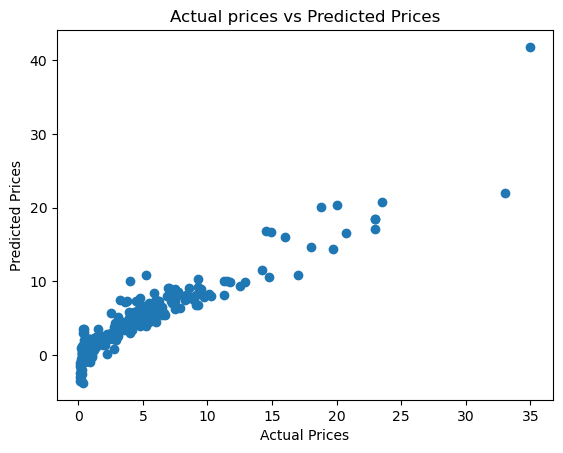

In [38]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual prices vs Predicted Prices')
plt.show()

In [40]:
#prediction on testing data
test_data_prediction = lm.predict(x_test)

In [41]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8365766715025409


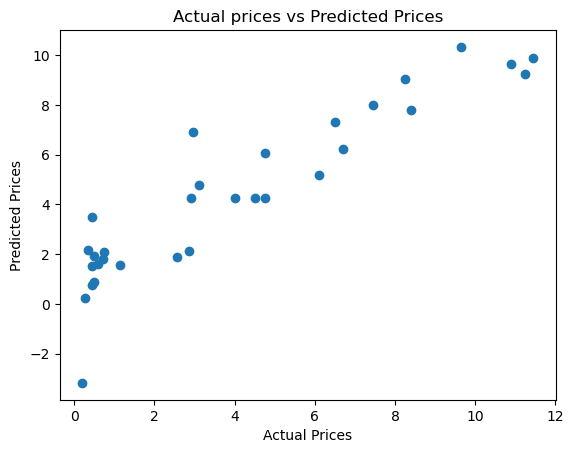

In [42]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual prices vs Predicted Prices')
plt.show()

## Lasso Regression

In [44]:
ls = Lasso()

In [45]:
ls.fit(x_train,y_train)

Lasso()

In [49]:
#prediction on training data
testL_data_prediction = ls.predict(x_train)

In [50]:
# R squared error
error_score = metrics.r2_score(y_train,testL_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8427856123435794


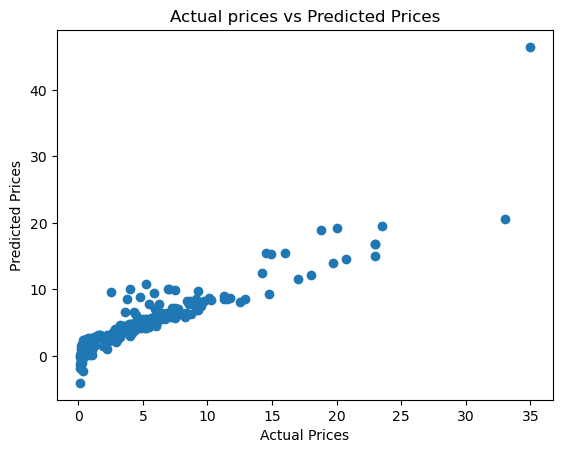

In [52]:
plt.scatter(y_train, testL_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual prices vs Predicted Prices')
plt.show()

In [53]:

testT_data_prediction = lm.predict(x_test)

In [54]:
# R squared error
error_score = metrics.r2_score(y_test,testT_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8365766715025409


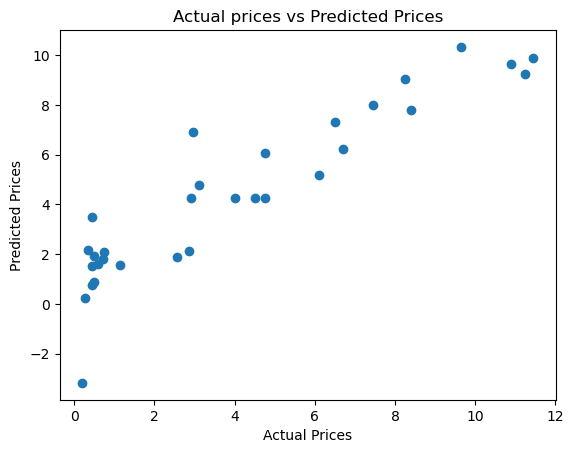

In [55]:
plt.scatter(y_test, testT_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual prices vs Predicted Prices')
plt.show()